<a href="https://colab.research.google.com/github/niruthikka24/Computer-Vision-Labs/blob/main/Inter-means_Segmentation/Inter_means_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

def inter_means_segmentation(image, max_iterations=100, tolerance=1e-3):
  # Step 1: Initialize the threshold with the average intensity of the image
  T = np.mean(image)

  for _ in range(max_iterations):
    # Step 2: Partition the image into two groups using the current threshold T
    R1 = image[image <= T]
    R2 = image[image > T]
    # Step 3: Calculate the mean grey values for each partition
    mu1 = np.mean(R1)
    mu2 = np.mean(R2)
    # Step 4: Update the threshold
    new_T = (mu1 + mu2) / 2
    # Step 5: Check for convergence
    if abs(new_T - T) < tolerance:
        break
    T = new_T

  # Convert the threshold to an integer (if needed)
  threshold = int(T)
  # Create a binary mask using the final threshold
  binary_mask = image > threshold
  return threshold, binary_mask

In [ ]:
from google.colab import files
up = files.upload()

Saving car.jpg to car.jpg
Saving flower1.jfif to flower1.jfif
Saving flower2.jfif to flower2.jfif
Saving image1.jpg to image1.jpg


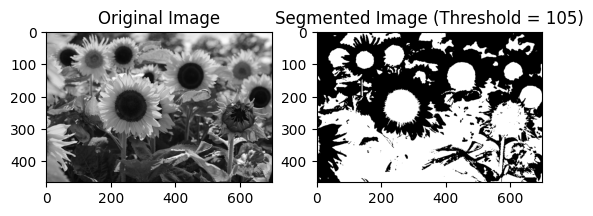

In [ ]:
import cv2
from matplotlib import pyplot as plt

# Load an example grayscale image
image = cv2.imread('sunflower.jpg', cv2.IMREAD_GRAYSCALE)

threshold, binary_mask = inter_means_segmentation(image)

# Display the segmented image
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(binary_mask, cmap='binary')
plt.title('Segmented Image (Threshold = {})'.format(threshold))
plt.show()

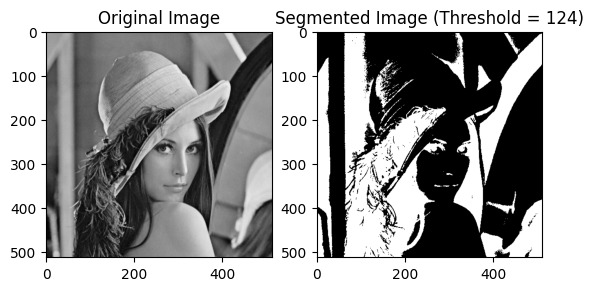

In [ ]:
import cv2
from matplotlib import pyplot as plt

# Load an example grayscale image
image = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

threshold, binary_mask = inter_means_segmentation(image)

# Display the segmented image
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(binary_mask, cmap='binary')
plt.title('Segmented Image (Threshold = {})'.format(threshold))
plt.show()

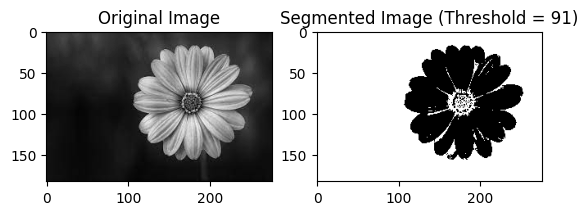

In [ ]:
import cv2
from matplotlib import pyplot as plt

# Load an example grayscale image
image = cv2.imread('flower1.jfif', cv2.IMREAD_GRAYSCALE)

threshold, binary_mask = inter_means_segmentation(image)

# Display the segmented image
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(binary_mask, cmap='binary')
plt.title('Segmented Image (Threshold = {})'.format(threshold))
plt.show()

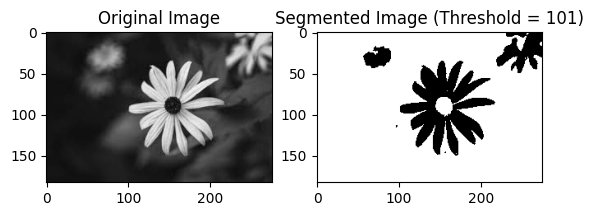

In [ ]:
import cv2
from matplotlib import pyplot as plt

# Load an example grayscale image
image = cv2.imread('flower2.jfif', cv2.IMREAD_GRAYSCALE)

threshold, binary_mask = inter_means_segmentation(image)

# Display the segmented image
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(binary_mask, cmap='binary')
plt.title('Segmented Image (Threshold = {})'.format(threshold))
plt.show()

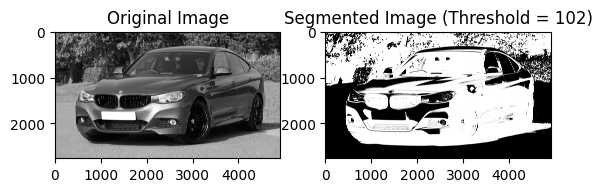

In [ ]:
import cv2
from matplotlib import pyplot as plt

# Load an example grayscale image
image = cv2.imread('car.jpg', cv2.IMREAD_GRAYSCALE)

threshold, binary_mask = inter_means_segmentation(image)

# Display the segmented image
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(binary_mask, cmap='binary')
plt.title('Segmented Image (Threshold = {})'.format(threshold))
plt.show()

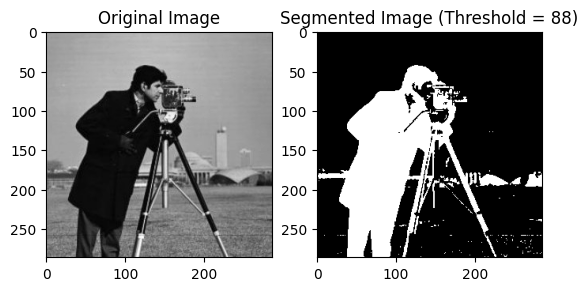

In [ ]:
import cv2
from matplotlib import pyplot as plt

# Load an example grayscale image
image = cv2.imread('image1.jpg', cv2.IMREAD_GRAYSCALE)

threshold, binary_mask = inter_means_segmentation(image)

# Display the segmented image
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(binary_mask, cmap='binary')
plt.title('Segmented Image (Threshold = {})'.format(threshold))
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def convert_to_grayscale(image):
  grayscale_image = np.zeros((image.shape[0], image.shape[1]), np.uint8)
  for x in range(image.shape[0]):
    for y in range(image.shape[1]):
      r, g, b = image[x][y]
      #weighted contributions of red, green and blue channels
      gray_value = 0.299 * r + 0.587 * g + 0.114 * b
      grayscale_image[x][y] = gray_value
  #ensure that the value is in the valid range [0, 255] for an 8-bit image
  return grayscale_image

def inter_means_segmentation(image, max_iterations=100, tolerance=1e-3):
  # Step 1: Initialize the threshold with the average intensity of the image
  T = np.mean(image)

  for _ in range(max_iterations):
    # Step 2: Partition the image into two groups using the current threshold T
    R1 = image[image <= T]
    R2 = image[image > T]
    # Step 3: Calculate the mean grey values for each partition
    mu1 = np.mean(R1)
    mu2 = np.mean(R2)
    # Step 4: Update the threshold
    new_T = (mu1 + mu2) / 2
    # Step 5: Check for convergence
    if abs(new_T - T) < tolerance:
        break
    T = new_T

  # Convert the threshold to an integer (if needed)
  threshold = int(T)
  # Create a binary mask using the final threshold
  binary_mask = np.zeros_like(image, dtype=np.uint8)
  binary_mask[image < threshold] = 255
  return threshold, binary_mask

def segment_image(image_path, save_path):
  img = Image.open(image_path)
  img = np.array(img)
  #convert to grayscale if RGB image
  if len(img.shape) == 3 and img.shape[2] == 3:
    img = convert_to_grayscale(img)
  threshold, binary_mask = inter_means_segmentation(img)
  print(f'The threshold chosen for segmentation: {threshold}')
  Image.fromarray(binary_mask).save(save_path)

segment_image('flower1.jfif', 'mask.png')

The threshold chosen for segmentation: 91
